In [1]:
# Loading all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS



In [2]:
# Loading the dataset
df = pd.read_csv('twitterdata.csv')


In [3]:
# checking weather data load without error
print(df.head(2))   


     screen_name                                               text  \
0         dwannb  Im getting ready to film Fox Soul Im on a pane...   
1  DrUmarJohnson  I am very disappointed in fox soul for not mak...   

   favorite_count  retweet_count  \
0             639             86   
1             400             97   

                                                 url                    id  \
0  www.twitter.com/dwannb/status/1567577089670549504  '1567577089670549504   
1  www.twitter.com/DrUmarJohnson/status/156790342...  '1567903424473186304   

            Date  friends_count  followers_count Post_Flag Tweet_Flag  \
0  9/7/2022 0:00            NaN              NaN      Post       Main   
1  9/8/2022 0:00            NaN              NaN      Post       Main   

  mediatype      Show  total_engagements Author Type Final Tagging  \
0       NaN  Fox Soul                725         NaN       Organic   
1     photo  Fox Soul                497         NaN       Organic   

           

In [16]:
# Converting caption text to upper case
print(data['text'].str.upper().head())


0    YOU NEVER KNOW WHAT KIND OF EXCLUSIVES THE #QU...
1    FOX SOUL LIVE: COCKTAILS WITH QUEENS PORTIA  M...
Name: text, dtype: object


In [17]:
# Printing the first caption
print(data['text'][0])


You never know what kind of exclusives the #Queens will have you sipping on so pour up a DRANK and have a #CocktailWithQueens and special guest @JarRule It all goes down TONIGHT at 8p/5p PT only on FOX SOUL #LinkInBio https://tco/7RouMPn2PZ


In [18]:
# Applying regex on text data and transforming it
data['text_new'] = ''
for i in range(len(data['text'])):
    m = re.search('(?<=:)(.*)', data['text'][i])
    try:
        data['text_new'][i]=m.group(0)
    except AttributeError:
        data['text_new'][i]=df['text'][i]
        
print(data['text_new'])


0                                     //tco/7RouMPn2PZ
1     Cocktails With Queens Portia  more https://tc...
Name: text_new, dtype: object


d:\WordCloud\wordcloud\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
def wordcloud_by_province(dataset):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    #Narendra Modi is the Prime minister of India
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",
                          stopwords=stopwords,
                          random_state = 2016).generate(" ".join([i for i in dataset['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("timepass")


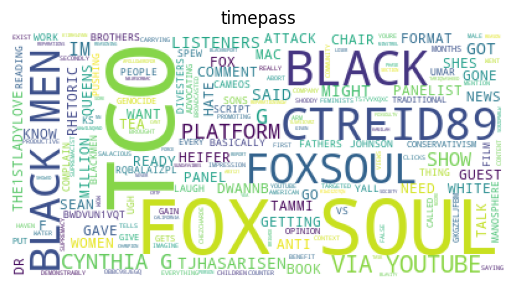

In [12]:
wordcloud_by_province(df)  

In [13]:
data = pd.read_csv('testing.csv')
data

,screen_name,text,favorite_count,retweet_count,url,id,Date,friends_count,followers_count,Post_Flag,Tweet_Flag,mediatype,Show,total_engagements,Author Type,Final Tagging,image_url,spend_level,subproperty
0,foxsoultv,You never know what kind of exclusives the #Qu...,2,1,www.twitter.com/foxsoultv/status/1569381831648...,'1569381831648198660,9/12/2022 0:00,NaN,NaN,Post,Main,video,Fox Soul,3,Show Page,Owned,http://pbs.twimg.com/ext_tw_video_thumb/156938...,NaN,NaN
1,Kiwes,FOX SOUL LIVE: Cocktails With Queens Portia m...,0,1,www.twitter.com/Kiwes/status/1569325345836515328,'1569325345836515328,9/12/2022 0:00,NaN,NaN,Post,Main,NaN,Fox Soul,1,NaN,Organic,NaN,NaN,NaN


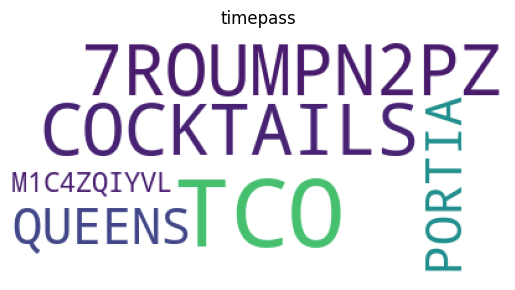

In [20]:
wordcloud_by_province(data)  